Method of Relaxation - 1D

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

**Plotting Each Iteration of the Method of Relaxation**

In [3]:
# location of boundaries along the x-axis
a = 0.0
b = 10.0

# number and location of points along the x-axis where to calculate the potential
N = 10
x = np.linspace(a,b,N)

# intializing the potential arrays with zeros as an initial guess
Vold = np.zeros(N)

# setting the boundary potentials 
Va = 0.0
Vb = 10.0
Vold[0] = Va
Vold[N-1] = Vb
Vnew = Vold + np.zeros(N)

# setting the tolerance for the calculation and the initial deviation > tolerance
tolerance = 0.01
deviation = tolerance + 1.0

# setting the number of iterations to 0 and the max number of iterations to something big
count = 0
maxiterations = 10000


done, number of iterations =  71 	 deviation =  0.009620499172108055


Text(0, 0.5, 'potential (Volts)')

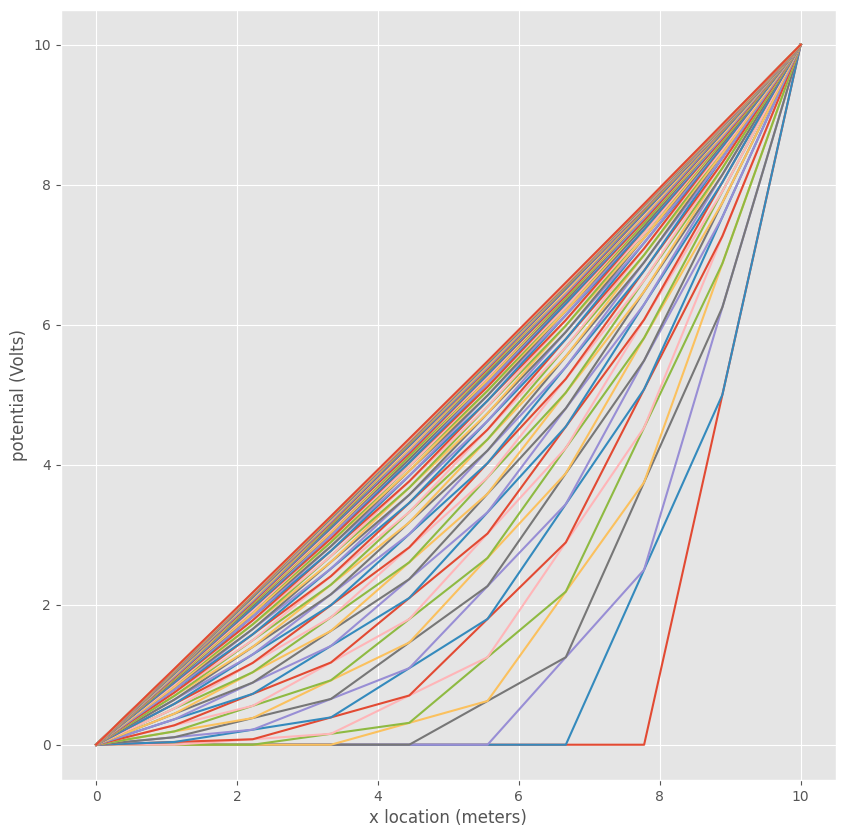

In [4]:
plt.figure(figsize=[10,10])

# performing the relaxation calculation so long as the solution has not converged
# and that the maximum number of iterations has not been exceeded
while (count < maxiterations) and (deviation > tolerance):
    for k in range(1,N-1):
        Vnew[k] = 0.5*(Vold[k-1] + Vold[k+1]) # using the averaging instruction to calculate the new potentials
    deviation = max(abs(Vnew-Vold))
    count += 1
    Vold = Vnew + np.zeros(N)
    plt.plot(x,Vnew)

print("done, number of iterations = ",count,"\t deviation = ",deviation)

plt.xlabel("x location (meters)")
plt.ylabel("potential (Volts)")

**Plotting The Number of Iterations Vs. The Tolerance For Initial Guess = Zeros**

Text(0, 0.5, 'number of iterations')

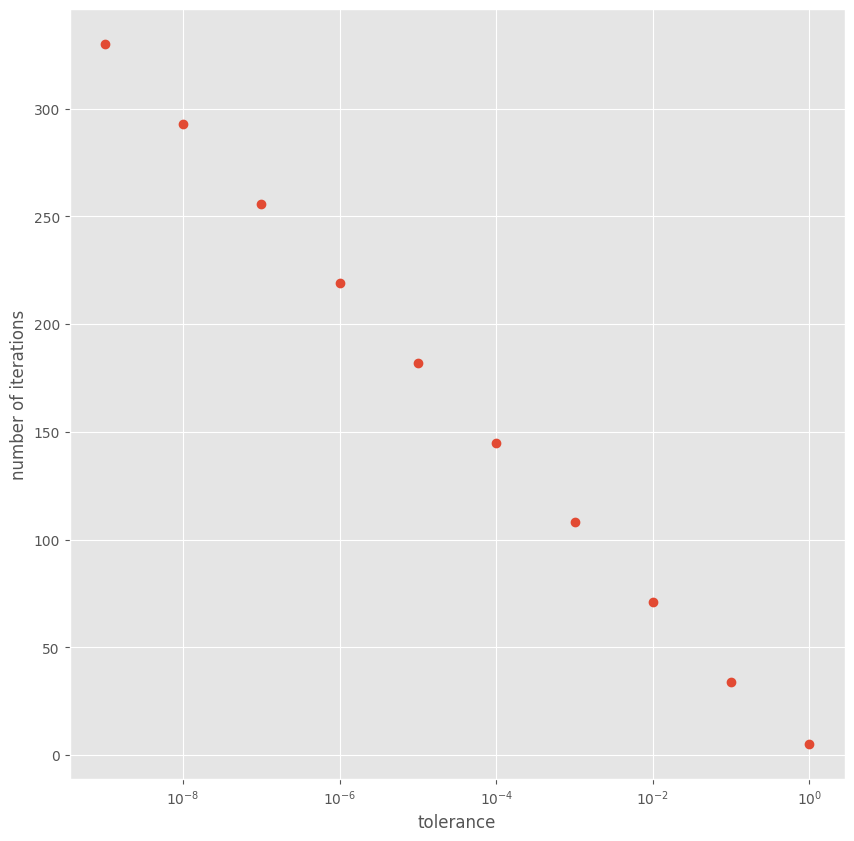

In [5]:
def get_number_of_iterations(tolerance):
# location of boundaries along the x-axis
    a = 0.0
    b = 10.0

# number and location of points along the x-axis where to calculate the potential
    N = 10
    x = np.linspace(a,b,N)

# intializing the potential arrays with zeros as an initial guess
    Vold = np.zeros(N)

# setting the boundary potentials 
    Va = 0.0
    Vb = 10.0
    Vold[0] = Va
    Vold[N-1] = Vb
    Vnew = Vold + np.zeros(N)

# setting the tolerance for the calculation and the initial deviation > tolerance
    deviation = tolerance + 1.0

# setting the number of iterations to 0 and the max number of iterations to something big
    count = 0
    maxiterations = 10000
    
# performing the relaxation calculation so long as the solution has not converged
# and that the maximum number of iterations has not been exceeded
    while (count < maxiterations) and (deviation > tolerance):
        for k in range(1,N-1):
            Vnew[k] = 0.5*(Vold[k-1] + Vold[k+1]) # using the averaging instruction to calculate the new potentials
        deviation = max(abs(Vnew-Vold))
        count += 1
        Vold = Vnew + np.zeros(N)
        
    return count

Ntol = 10
tarray = np.zeros(Ntol)
carray = np.zeros(Ntol)
for k in range(0,Ntol):
    tolerance = 10**(-k)
    tarray[k] = tolerance
    carray[k] = get_number_of_iterations(tolerance)

plt.figure(figsize=[10,10])
plt.semilogx(tarray,carray,"o")
plt.xlabel("tolerance")
plt.ylabel("number of iterations")

Wow, that convergence is actually pretty good. Time for the 2D version. We actually did this already in Phy 415

In [39]:
def initialize_grid_2d(size):
    '''Initialize the grid of potential values'''
    return np.zeros((size, size))
        

def relax(phi, N, tolerance, max_iterations=10000, store_frequency=1000):
    '''phi is the grid of potential values that you initialized
    after you set the boundary conditions. That is key!
    N is the size of the grid (assumed square
    tolerance is the stopping criterion - you control this; be careful
    max_iterations is the maximum number of iterations to run (stops loop if not converged)
    store_frequency is how often you want to store the phi values (for plotting)'''
    
    iterations = 0 ## Keep track of the number of iterations
    delta = 1.0 ## Initialize delta (error) to be larger than tolerance
    
    stored_phi = [] ## Keep track of phi values for plotting
    stored_deltas = []  ## Keep track of delta values for plotting
    
    ## Loop condition to run until convergence or max_iterations
    while delta > tolerance and iterations < max_iterations:
        # Store the old phi values to calculate delta later
        phi_old = phi.copy()

        i = 1
        while i<len(phi)-1:
            j = 1
            while j<len(phi[i])-1:
                phi[i,j] = 0.25*(phi[i,j-1] + phi[i,j+1] + phi[i+1,j] + phi[i-1,j])
                j += 1
            i += 1
                
        # Calculate delta: max difference between new and old phi values
        delta = np.max(np.abs(phi - phi_old))
        
        ## Increment the iteration counter
        iterations += 1
        
        ## Store phi and delta values every store_frequency iterations
        if iterations % store_frequency == 0:
            stored_phi.append(phi.copy())
            stored_deltas.append(delta)
        if iterations % 500 == 0:
            print(f"Iteration: {iterations}, Delta: {delta}")
    
    return stored_phi, stored_deltas, iterations

# Boundary conditions
tolerance = 1e-4
N = 100
phi = initialize_grid_2d(N+1)

# Set varying potential on top boundary
phi[-1] = 0 #top due to indexing 
phi[0] = 20 #bottom
phi[:,0] = 0 #left
phi[:,-1] = 0 #right


capture_rate = 5

stored_phi, stored_deltas, iterations = relax(phi, N, tolerance, store_frequency=capture_rate)
print(f"Converged in {iterations} iterations.")

Iteration: 500, Delta: 0.008974013531378944
Iteration: 1000, Delta: 0.0036567098546118615
Iteration: 1500, Delta: 0.0019140152776850883
Iteration: 2000, Delta: 0.0011083057945162622
Iteration: 2500, Delta: 0.0006663577551941913
Iteration: 3000, Delta: 0.0004051607084445408
Iteration: 3500, Delta: 0.00024704187571877867
Iteration: 4000, Delta: 0.00015075305803868844
Converged in 4416 iterations.


Note: We can actually include an initial guess when we're running relaxation. Any value put into the middle of the grid will serve as an initial guess, and will be overwritten as the relaxation algorithm is run.

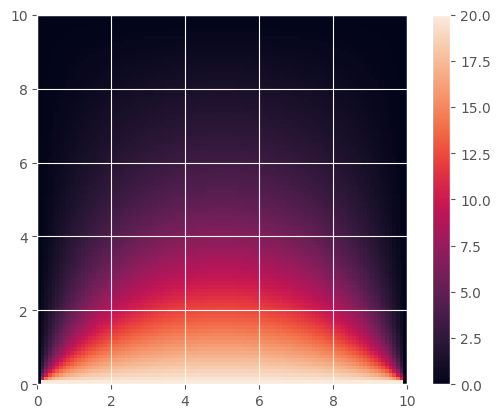

In [40]:
# displaying the plotted heatmap 
from seaborn import cm

plt.imshow(phi, cmap=cm.rocket, interpolation='nearest', extent=[0,10,0,10], origin='lower')
plt.colorbar()
plt.show()

Wouldn't it be cool if we could make it animated?

Make sure pillow is installed

The fast version below uses max 100 frames, and saves to a much denser gif, so it should take ~15 seconds to run

In [41]:
from matplotlib.animation import PillowWriter
from numpy import ceil

metadata = {'title': 'Movie', 'artist': 'AndrewKoren'}
writer = PillowWriter(fps=10, metadata=metadata)

fig = plt.figure(figsize=(8,8))
used_frames = int(ceil(len(stored_phi)/100))

truncated_phi = stored_phi[::used_frames]

with writer.saving(fig, 'relaxation.gif', 100):
    for i, phi in enumerate(truncated_phi):
        plt.imshow(phi, cmap=cm.rocket, interpolation='nearest', extent=[0,1,0,1], origin='lower')
        plt.colorbar()
        plt.title(f'iteration {i*capture_rate*used_frames}')
        writer.grab_frame()
        fig.clf()

<Figure size 800x800 with 0 Axes>

This next one saves the animation to 'relaxation.webp', but takes like 3 minutes to make the 20 second video. It uses every frame and has fewer artifacts from compression

In [42]:
framerate = 60
writer = PillowWriter(fps=framerate, metadata=metadata)

fig = plt.figure(figsize=(8,8))

with writer.saving(fig, 'relaxation.webp', 100):
    for i, phi in enumerate(stored_phi):
        plt.imshow(phi, cmap=cm.rocket, interpolation='nearest', extent=[0,1,0,1], origin='lower')
        plt.colorbar()
        plt.title(f'iteration {i*capture_rate}')
        writer.grab_frame()
        fig.clf()

<Figure size 800x800 with 0 Axes>

Let's do one more example, for fun

In [43]:
# Boundary conditions
tolerance = 1e-5
N = 100
phi = initialize_grid_2d(N+1)


edge = np.linspace(0, 1, N+1)



# Set varying potential on top boundary
phi[-1] = np.sin(2*np.pi*edge) #top due to indexing 
phi[0] = np.cos(2*np.pi*edge) #bottom
phi[:,0] = -1 #left
phi[:,-1] = 0 #right


capture_rate = 5

stored_phi, stored_deltas, iterations = relax(phi, N, tolerance, store_frequency=capture_rate)
print(f"Converged in {iterations} iterations.")

Iteration: 500, Delta: 0.0004632580796130603
Iteration: 1000, Delta: 0.00021049312912441165
Iteration: 1500, Delta: 0.0001213854326126973
Iteration: 2000, Delta: 7.317480062241088e-05
Iteration: 2500, Delta: 4.4502176697214235e-05
Iteration: 3000, Delta: 2.7134982590548695e-05
Iteration: 3500, Delta: 1.655685100332427e-05
Iteration: 4000, Delta: 1.0104820805656445e-05
Converged in 4011 iterations.


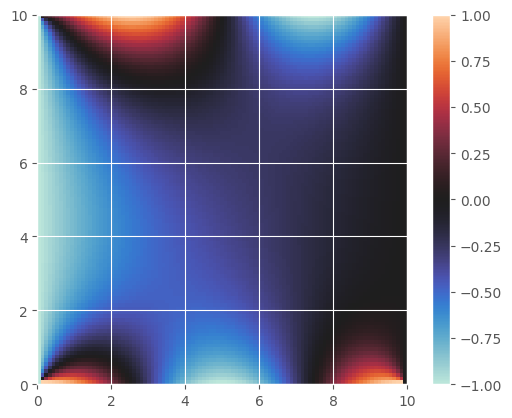

In [44]:
# displaying the plotted heatmap 

plt.imshow(phi, cmap=cm.icefire, interpolation='nearest', extent=[0,10,0,10], origin='lower')
plt.colorbar()
plt.show()